                                     בסייד

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [ ]:
print(iris.DESCR)

In [5]:
df_iris = pd.DataFrame(iris.data,  columns=iris.feature_names)
variety = iris.target
df_iris.drop(['petal length (cm)','petal width (cm)'] , axis=1, inplace=True)
df_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_iris, variety, test_size=0.25, random_state=13)
lda = LinearDiscriminantAnalysis()
lda_fit = lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
accuracy_score(y_test, lda_pred) #точность данной модели 81 %

0.8157894736842105

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
#Define method to evaluate model \стратифицированная перекрестная проверка в k-кратном порядке.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#оценка модели
scores = cross_val_score(lda, df_iris, variety, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   


0.7977777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


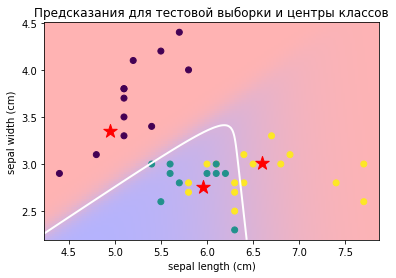

In [10]:
plt.scatter(x=X_test['sepal length (cm)'], y=X_test['sepal width (cm)'], c=y_test)

plt.scatter(lda_fit.means_[:, 0], lda_fit.means_[:, 1], c='r', s=200, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_fit.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.title('Предсказания для тестовой выборки и центры классов')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [11]:
# Логистическая регрессия для интереса

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
accuracy_score(y_test, lr.predict(X_test)) # точность модели 79 % , не сильно отличается от 81 %  в LDA модели

0.7894736842105263

***Кластеризация***

In [12]:
df_iris.head()


,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


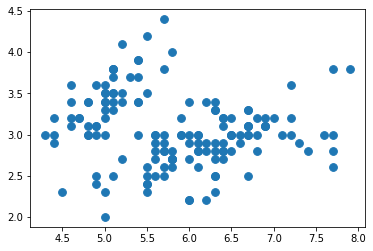

In [13]:
plt.scatter(x=df_iris['sepal length (cm)'], y=df_iris['sepal width (cm)'], s=60)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

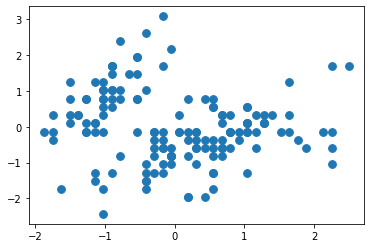

In [15]:
df_iris_scaled = scaler.fit_transform(df_iris)
plt.scatter(df_iris_scaled[:, 0], df_iris_scaled[:, 1],cmap='autumn', s=60)


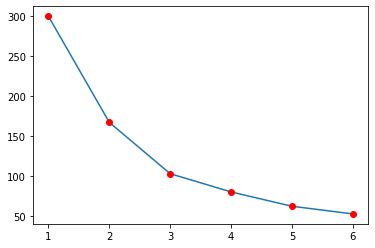

In [16]:
#график локтя
from sklearn.cluster import KMeans

k_inertia = []
ks = range(1, 7)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit(df_iris_scaled)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')   # по результатам видим что оптимальное количество кластеров 3

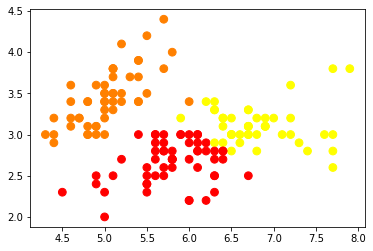

In [17]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_iris_scaled)
plt.scatter(df_iris['sepal length (cm)'], df_iris['sepal width (cm)'],cmap='autumn', c=clusters, s=60)